Exercise No : 1718131

Date : 07.09.2020

Reg No : 1718131


---

**For the given equation : Y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6, find the maximize such equation using Genetic Algorithm, where (x1,x2,x3,x4,x5,x6) = (4,-2,7,5,11,1)**


In [19]:
%pip install pygad

Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
Generation = 1
Fitness    = 10.011403790591803
Change     = 10.011403790591803
Generation = 2
Fitness    = 28.566608470317444
Change     = 18.55520467972564
Generation = 3
Fitness    = 44.3853200554356
Change     = 15.818711585118155
Generation = 4
Fitness    = 108.1522230840354
Change     = 63.7669030285998
Generation = 5
Fitness    = 108.1522230840354
Change     = 0.0
Generation = 6
Fitness    = 108.1522230840354
Change     = 0.0
Generation = 7
Fitness    = 108.1522230840354
Change     = 0.0
Generation = 8
Fitness    = 235.6235578041272
Change     = 127.47133472009179
Generation = 9
Fitness    = 235.6235578041272
Change     = 0.0
Generation = 10
Fitness    = 235.6235578041272
Change     = 0.0
Generation = 11
Fitness    = 235.6235578041272
Change     = 0.0
Generation = 12
Fitness    = 235.6235578041272
Change     = 

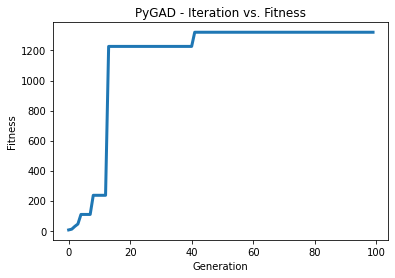

Parameters of the best solution : [ 1.68809464  2.2449513  -1.16505342 -0.44606403  4.81068796 -0.7951062 ]
Fitness value of the best solution = 1321.4103518058369
Index of the best solution : 0
Predicted output based on the best solution : 43.99924323280907
Best fitness value reached after 41 generations.


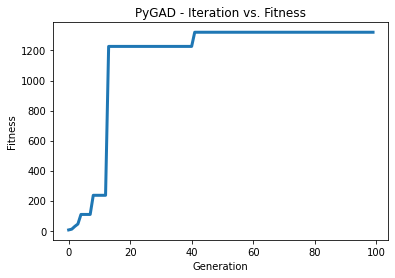

In [20]:
import pygad
import numpy

function_inputs = [4,-2,7,5,11,1] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 7 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       callback_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()